In [1118]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1119]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1120]:
#データフレームへの読み込み
df = pd.read_csv('/Users/rukasumichika/最終課題/data/LengthOfStay.csv')

In [1121]:
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [1122]:
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [1123]:
df.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

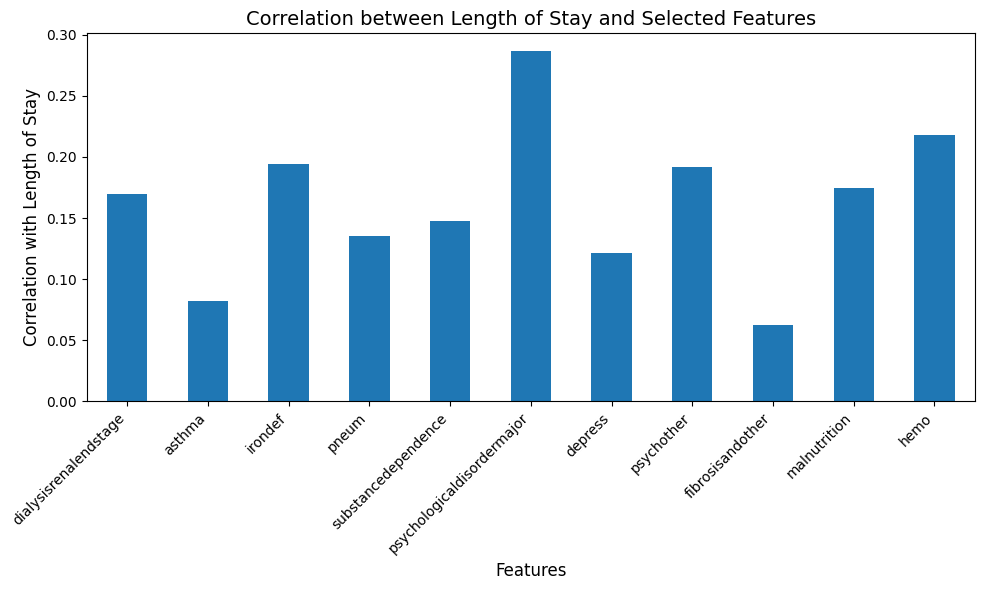

In [1124]:
# 洞察のための相関グラフ（数字列のみ）

# 相関が予想される項目を抜き出す
select_features = df[['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo']]

# float型の列をint型に変換
select_features = select_features.astype({col: 'int' for col in select_features.select_dtypes(include='float').columns})

# 'lengthofstay' と selected_features の各列との相関を計算
correlations = select_features[select_features.columns].corrwith(df['lengthofstay'])

# 相関を棒グラフとしてプロット
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')

# グラフの設定
plt.title('Correlation between Length of Stay and Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Length of Stay', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする
plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [1125]:
from ydata_profiling import ProfileReport

In [1126]:
# vdata列とdischarged列をTimestamp型に変換（日付のみを扱う）
df['vdate'] = pd.to_datetime(df['vdate']).dt.date
df['discharged'] = pd.to_datetime(df['discharged']).dt.date

# vdata列を数字（YYYYMMDD）形式に変換
df['vdate'] = pd.to_datetime(df['vdate']).dt.strftime('%Y%m%d').astype(int)
df['discharged'] = pd.to_datetime(df['discharged']).dt.strftime('%Y%m%d').astype(int)

# 結果の確認
print(df[['vdate', 'discharged']].head())

      vdate  discharged
0  20120829    20120901
1  20120526    20120602
2  20120922    20120925
3  20120809    20120810
4  20121220    20121224


In [1127]:
# 'rcount' 列で '5+' を 5 に変換
df['rcount'] = df['rcount'].replace('5+', 5)
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,20120829,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,20120901,B,3
1,2,20120526,5,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,20120602,A,7
2,3,20120922,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,20120925,B,3
3,4,20120809,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,20120810,A,1
4,5,20121220,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,20121224,E,4


In [1128]:
# genderに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['gender'], prefix='gender')

# int型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'gender' 列を削除
df.drop('gender', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,gender_F,gender_M
0,1,20120829,0,0,0,0,0,0,0,0,...,1.390722,30.432418,96,6.5,4,20120901,B,3,1,0
1,2,20120526,5,0,0,0,0,0,0,0,...,0.943164,28.460516,61,6.5,1,20120602,A,7,1,0
2,3,20120922,1,0,0,0,0,0,0,0,...,1.065750,28.843812,64,6.5,2,20120925,B,3,1,0
3,4,20120809,0,0,0,0,0,0,0,0,...,0.906862,27.959007,76,6.5,1,20120810,A,1,1,0
4,5,20121220,0,0,0,0,1,0,1,0,...,1.242854,30.258927,67,5.6,2,20121224,E,4,1,0


In [1129]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['facid'], prefix='facid')

# bool型をint型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'facid' 列を削除
df.drop('facid', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,secondarydiagnosisnonicd9,discharged,lengthofstay,gender_F,gender_M,facid_A,facid_B,facid_C,facid_D,facid_E
0,1,20120829,0,0,0,0,0,0,0,0,...,4,20120901,3,1,0,0,1,0,0,0
1,2,20120526,5,0,0,0,0,0,0,0,...,1,20120602,7,1,0,1,0,0,0,0
2,3,20120922,1,0,0,0,0,0,0,0,...,2,20120925,3,1,0,0,1,0,0,0
3,4,20120809,0,0,0,0,0,0,0,0,...,1,20120810,1,1,0,1,0,0,0,0
4,5,20121220,0,0,0,0,1,0,1,0,...,2,20121224,4,1,0,0,0,0,0,1


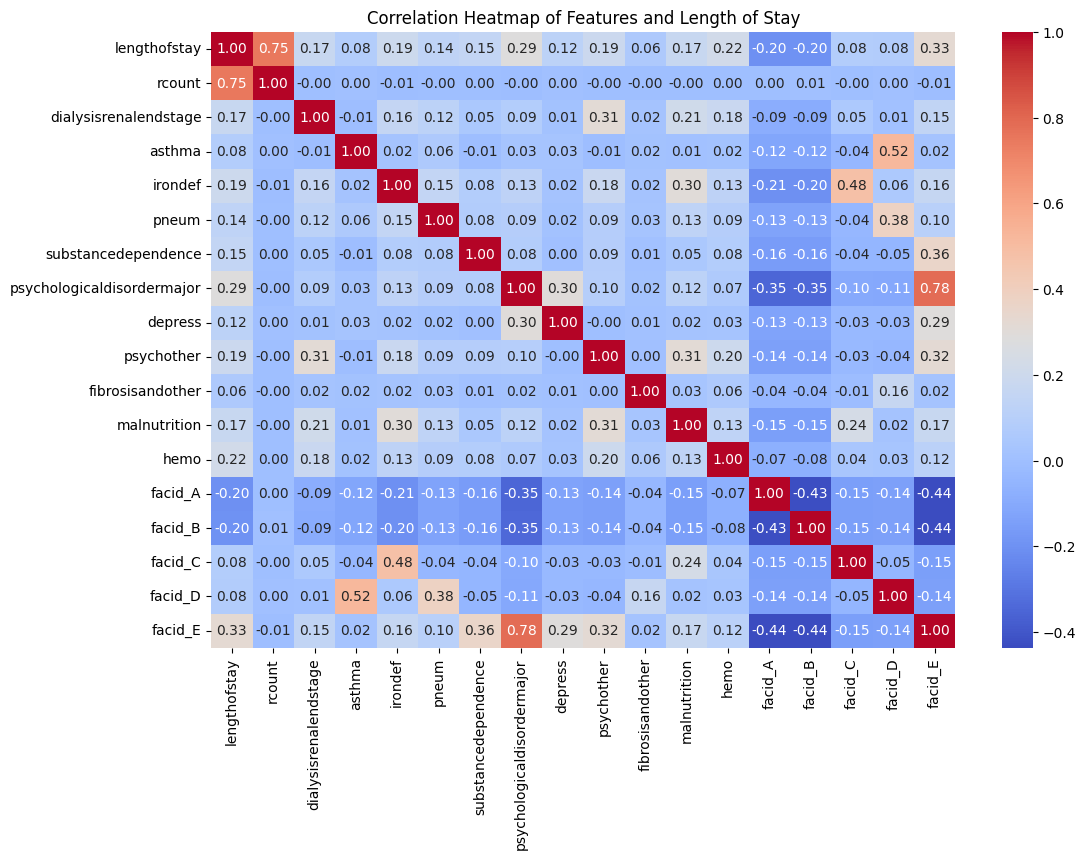

In [1130]:
# 相関行列のヒートマップを作成
# 相関が予想される項目を抜き出す
selected_features = df[['lengthofstay', 'rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E']]

# float型の列をint型に変換
selected_features = selected_features.astype({col: 'int' for col in selected_features.select_dtypes(include='float').columns})

#　object型の列をint型に変換
selected_features['rcount'] = selected_features['rcount'].astype(int)

# 相関行列を作成
corr_matrix = selected_features.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Length of Stay')
plt.show()

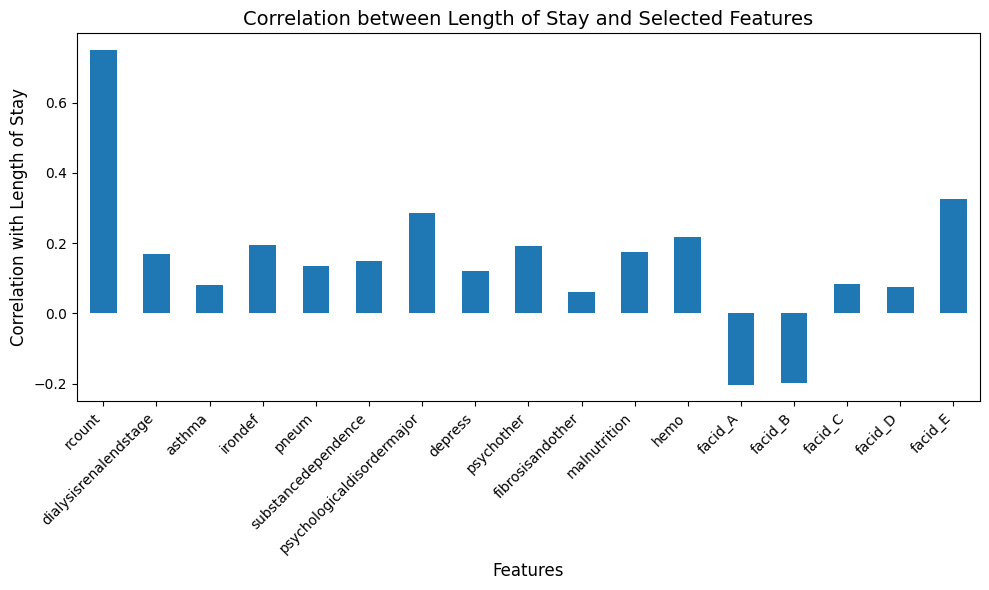

In [1131]:
# 相関行列の棒グラフを作成
# 相関が予想される項目を抜き出す
selected_features = df[['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E']]

# float型の列をint型に変換
selected_features = selected_features.astype({col: 'int' for col in selected_features.select_dtypes(include='float').columns})

#　object型の列をint型に変換
selected_features['rcount'] = selected_features['rcount'].astype(int)

# 'lengthofstay' と selected_features の各列との相関を計算
correlations = selected_features[selected_features.columns].corrwith(df['lengthofstay'])

# 相関を棒グラフとしてプロット
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')

# グラフの設定
plt.title('Correlation between Length of Stay and Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Length of Stay', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする
plt.tight_layout()  # レイアウトを自動調整
plt.show()


In [1132]:
# 'eid', 'vdate', 'discharged'を除外する
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])
print(df_filtered.columns)

Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',
       'lengthofstay', 'gender_F', 'gender_M', 'facid_A', 'facid_B', 'facid_C',
       'facid_D', 'facid_E'],
      dtype='object')


In [1133]:
from sklearn.model_selection import train_test_split

In [1134]:
# 学習データとテストデータに分割
X = df_filtered.drop(columns=['lengthofstay']).to_numpy()
y = df_filtered['lengthofstay'].to_numpy()

In [1135]:
# 比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 29) (30000, 29) (70000,) (30000,)


In [1137]:
# StandardScalerクラスのインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1138]:
# 標準化したいインデックスを確認
print(X_train.shape)
print(df_filtered.drop(columns=['lengthofstay']).columns)

(70000, 29)
Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F',
       'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')


In [1139]:
# 標準化したい特徴量を抽出（22列目までを選択）
columns_to_scale = list(range(0, 22))

In [1140]:
# X_trainから指定したを特徴量抽出
X_train_selected = X_train[:, columns_to_scale]

In [1141]:
# StandardScalerを使って標準化
X_train_scaler = scaler.fit_transform(X_train_selected)

In [1142]:
# 標準化した部分を代入
X_train_scaled = np.copy(X_train)  # 元のデータのコピーを作成
X_train_scaled[:, columns_to_scale] = X_train_scaler

# 結果を表示（形状を確認）
print(X_train_scaled.shape)

(70000, 29)


In [1143]:
# 変換前(X_train)の状態
df_X_train = pd.DataFrame(X_train, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,0,0,0,0,0,0,0,0,0,0,...,60,6.5,2,0,1,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,87,6.5,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,61,5.6,2,0,1,0,1,0,0,0
3,2,1,0,0,0,0,1,0,0,0,...,87,6.5,1,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,84,5.1,4,1,0,0,0,0,0,1


In [1144]:
# 変換後(X_train_scaled)の状態
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train_scaled.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,-0.722221,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,-0.071193,...,-1.15258,0.01174,-0.061181,0,1,1,0,0,0,0
1,-0.722221,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,1.785527,-0.233968,-0.229243,-0.071193,...,1.161112,0.01174,-0.54779,1,0,0,0,0,0,1
2,-0.722221,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,-0.071193,...,-1.066888,-1.573468,-0.061181,0,1,0,1,0,0,0
3,0.574156,5.155654,-0.190244,-0.325043,-0.202333,-0.258702,1.785527,-0.233968,-0.229243,-0.071193,...,1.161112,0.01174,-0.54779,0,1,0,0,0,0,1
4,-0.722221,-0.193962,-0.190244,-0.325043,-0.202333,3.865449,-0.560059,-0.233968,-0.229243,-0.071193,...,0.904035,-2.454139,0.912038,1,0,0,0,0,0,1


In [1145]:
df_X_train_scaled.describe()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.00000,70000.00000,70000,70000,70000,70000,70000,70000,70000
unique,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,94.000000,158.00000,11.00000,2,2,2,2,2,2,2
top,-0.722221,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,-0.071193,...,-0.209965,0.01174,-0.54779,1,0,0,0,0,0,0
freq,38654.000000,67462.000000,67555.000000,63311.000000,67247.000000,65609.000000,53286.000000,66367.000000,66505.000000,69647.000000,...,2406.000000,45371.00000,34992.00000,40467,40467,48975,48965,66694,66863,48503


In [1146]:
# X_testも同様に標準化
X_test_selected = X_test[:, columns_to_scale]
X_test_scaler = scaler.fit_transform(X_test_selected)

In [1147]:
# 標準化した部分を代入
X_test_scaled = np.copy(X_test)  # 元のデータのコピーを作成
X_test_scaled[:, columns_to_scale] = X_test_scaler

# 結果を表示（形状を確認）
print(X_test_scaled.shape)

(30000, 29)


In [1148]:
# 変換前(X_test)の状態
df_X_test = pd.DataFrame(X_test, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,0,0,0,0,0,0,0,0,0,0,...,67,5.4,1,1,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,83,6.5,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,76,6.5,1,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,67,6.5,5,0,1,0,1,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,51,6.5,1,1,0,0,1,0,0,0


In [1149]:
# 変換後(X_test_scaled)の状態
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test_scaled.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,-0.730574,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,-0.561438,-0.23206,-0.224872,-0.064944,...,-0.555165,-1.920166,-0.547795,1,0,1,0,0,0,0
1,-0.082634,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,1.781141,-0.23206,-0.224872,-0.064944,...,0.825864,0.009157,-0.547795,1,0,0,0,0,0,1
2,-0.730574,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,-0.561438,-0.23206,-0.224872,-0.064944,...,0.221664,0.009157,-0.547795,0,1,1,0,0,0,0
3,-0.730574,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,-0.561438,-0.23206,-0.224872,-0.064944,...,-0.555165,0.009157,1.412701,0,1,0,1,0,0,0
4,1.213247,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,-0.561438,-0.23206,-0.224872,-0.064944,...,-1.936195,0.009157,-0.547795,1,0,0,1,0,0,0


In [1150]:
df_X_test_scaled.describe()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
count,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000,30000,30000
unique,6.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,...,97.000000,143.000000,11.000000,2,2,2,2,2,2,2
top,-0.730574,-0.195464,-0.193433,-0.32116,-0.203414,-0.261124,-0.561438,-0.23206,-0.224872,-0.064944,...,-0.209908,0.009157,-0.547795,1,0,0,0,0,0,0
freq,16377.000000,28896.000000,28918.000000,27195.00000,28808.000000,28085.000000,22810.000000,28467.00000,28556.000000,29874.000000,...,1074.000000,19462.000000,15037.000000,17176,17176,20990,21023,28607,28638,20742


In [1151]:
# 重回帰で分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1152]:
# 予測モデルの学習
model.fit(X_train_scaled, y_train)

LinearRegression()

In [1153]:
# 学習データを用いて決定係数を算出
model.score(X_train_scaled, y_train)

0.7614044715177147

In [1154]:
# テストデータを用いて決定係数を算出
model.score(X_test_scaled, y_test)

0.7634533789997633

In [1155]:
# テストデータに対する予測
y_pred = model.predict(X_test_scaled)

In [1156]:
# 二乗平均平方根誤差（RMSE）の値を算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.1483104162457856

In [1157]:
# 平均絶対誤差(MAPE) の値を算出
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

32.12517345060142

In [1158]:
# 計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

係数: [ 1.77391355e+00  1.35671815e-01  6.51143594e-02  9.63063408e-02
  8.69404182e-02  1.37826508e-01  3.28318167e-01  7.99805079e-02
  1.33974594e-01  5.41889774e-02  6.72862813e-02  3.36784913e-01
  2.00722863e-02  1.18789819e-01  2.24728896e-04  3.49965811e-03
  9.73188275e-02 -2.84536121e-03 -1.40794985e-03  3.45195042e-04
 -2.21225414e-02  1.44364578e-03 -1.03144241e+11 -1.03144241e+11
 -5.65077917e+10 -5.65077917e+10 -5.65077917e+10 -5.65077917e+10
 -5.65077917e+10]
切片: 159652033102.39478


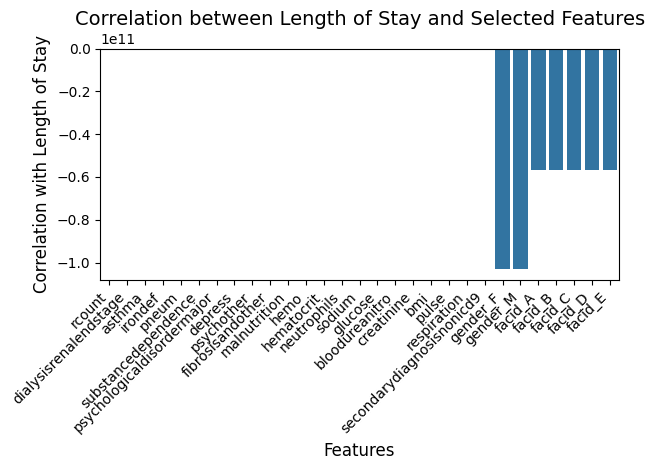

In [1159]:
# 各要素が入院期間に与える影響度合い
sns.barplot(x = ['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9','gender_F', 'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'], y=model.coef_)

# グラフの設定
plt.title('Correlation between Length of Stay and Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Length of Stay', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする
plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [1160]:
# DataFrame に変換
df = pd.DataFrame({
    'Actual': y_test,     # 実際の値
    'Predicted': y_pred   # 予測された値
})

# DataFrame を表示
df

,Actual,Predicted
0,1,1.661865
1,5,4.546631
2,2,2.312836
3,2,1.876831
4,5,5.224640
...,...,...
29995,10,6.788055
29996,3,3.200043
29997,7,6.425659
29998,1,1.766785
